## Chapter 2. 영상 처리 (p109)

---

In [1]:
## import
import matplotlib.pyplot as plt
import cv2
import numpy as np


1. 다음에 제시된 명암 단계가 [0,9]이고, 크기가 5x5인 영상에 대해 답하시오.


In [2]:

img = [[1,1,2,2,2],
       [0,1,3,4,3],
       [2,3,6,7,3],
       [4,5,8,7,7],
       [3,4,4,4,3]]

1 ) 히스토그램을 구하시오.

[1, 3, 4, 6, 5, 1, 1, 3, 1]


<BarContainer object of 9 artists>

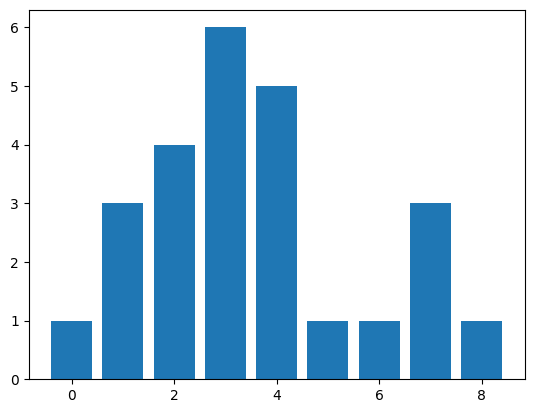

In [13]:
hist = [ 0 for i in range(9)]
for j in range(5) :
    for i in range(5) :
        hist[img[j][i]] += 1
print(hist)
plt.bar(range(9) , hist,)

2 ) 히스토그램 평활화를 위한 매핑 표를 구하시오.

[0, 0, 0, 1, 2, 2, 2, 2, 2]


<BarContainer object of 9 artists>

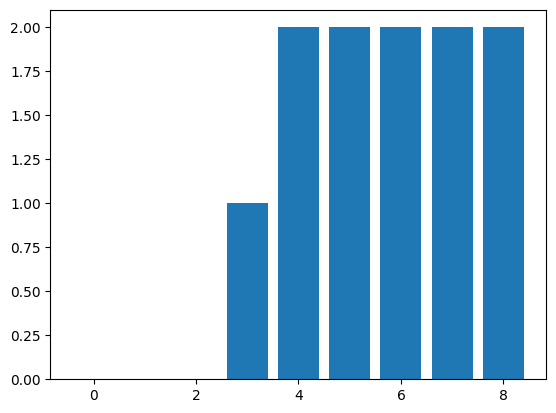

In [22]:
cumsum_hist = [0 for _ in range(9)]
total = 0
for i in range(len(hist)) :
    total += hist[i] 
    cumsum_hist[i] = total // 9
    

print(cumsum_hist)
plt.bar(range(9), cumsum_hist)

3 ) 평활화된 영상을 제시하시오.



In [23]:
new_img = [[0 for _ in range(5)] for _ in range(5)]

for j in range(5) :
    for i in range(5) :
        new_img[j][i] = cumsum_hist[img[j][i]]

print(new_img)

[[0, 0, 0, 0, 0], [0, 0, 1, 2, 1], [0, 1, 2, 2, 1], [2, 2, 2, 2, 2], [1, 2, 2, 2, 1]]


2. 2.3.2절의 연결요소 번호 붙이기 알고리즘에 대해 답하시오.

1 ) [알고리즘 2-5]를 8-연결성 버전으로 바꾸기 위한 flood_fill8() 함수를 제시하시오.

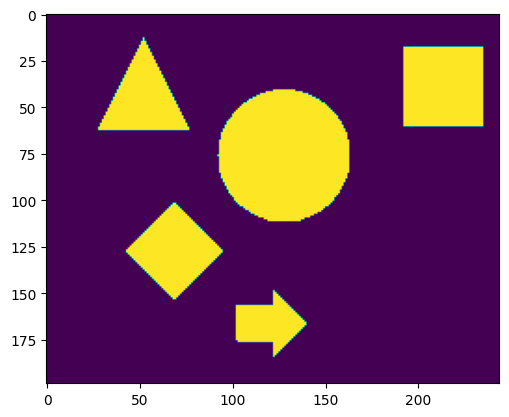

: 

: 

In [10]:

img = cv2.imread('../img/figures.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

h,w = img.shape[:2]
copy_img = [[0 for _ in range(w)] for _ in range(h)]

for j in range(h) :
    for i in range(w) :
        if img[j][i] == 255 :
            copy_img[j][i] = -1
        else :
            copy_img[j][i] = 0

def flood_fill8(img, y, x, label) :

    if img[y][x] == -1 : 
        img[y][x] = label

        flood_fill8(img, y-1, x-1, label)
        flood_fill8(img, y-1, x, label)
        flood_fill8(img, y-1, x+1, label)
        flood_fill8(img, y, x-1, label)
        flood_fill8(img, y, x+1, label)
        flood_fill8(img, y+1, x-1, label)
        flood_fill8(img, y+1, x, label)
        flood_fill8(img, y+1, x+1, label)



label = 1
for j in range(1, h-2) :
    for i in range(1, w-2) :
        if copy_img[j][i] == -1 :
            flood_fill8(copy_img, j, i, label)
            label += 1

print(np.unique(copy_img))
plt.imshow(copy_img)

2 ) [알고리즘 2-6]을 8-연결성 버전으로 바꾸기 위한 efficient_floodfill8() 함수를 제시하시오.

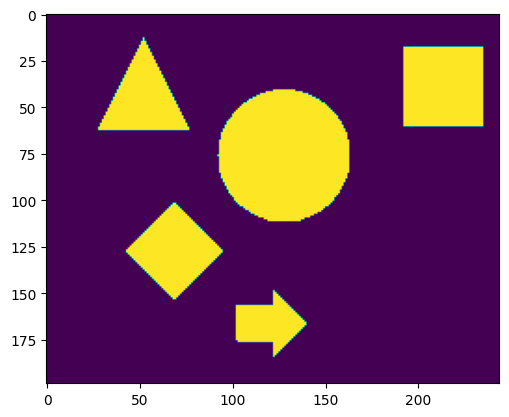

[0 1 2 3 4 5]


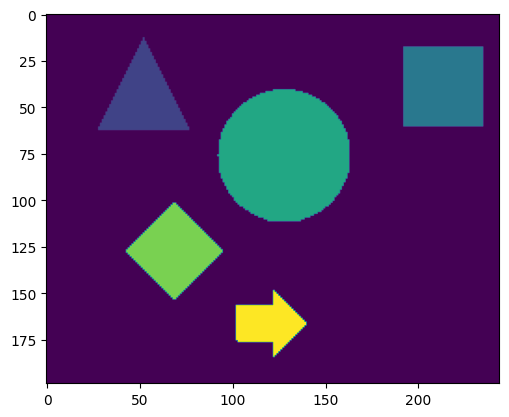

In [3]:

img = cv2.imread('../img/figures.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

plt.imshow(img)
plt.show()

h,w = img.shape[:2]
copy_img = [[0 for _ in range(w)] for _ in range(h)]

for j in range(h) :
    for i in range(w) :
        if img[j][i] == 255 :
            copy_img[j][i] = -1
        else :
            copy_img[j][i] = 0

def efficient_flood_fill8(img, y, x, label) :
    queue = []
    queue.append([y,x])
    while queue :
        (y,x) = queue.pop(0)
        if img[y][x] == -1 :
            left = right = x
            while img[y][left-1] == -1 :
                left -= 1
            while img[y][right+1] == -1 :
                right += 1
            for c in range(left, right+1) :
                img[y][c] = label
                if img[y-1][c] == -1 :# and (c==left or img[y-1][c-1] != -1) :
                    queue.append([y-1, c])
                if img[y+1][c] == -1 : # and (c==left or img[y+1][c-1] != -1) :
                    queue.append([y+1, c])



label = 1
for j in range(1, h-2) :
    for i in range(1, w-2) :
        if copy_img[j][i] == -1 :
            efficient_flood_fill8(copy_img, j, i, label)
            label += 1

print(np.unique(copy_img))
plt.imshow(copy_img)

3. 식 (2.11)을 이용하여 문제 1의 영상을 변환하시오.

1 ) a=2로 두고 영상을 밝게 변환하시오.

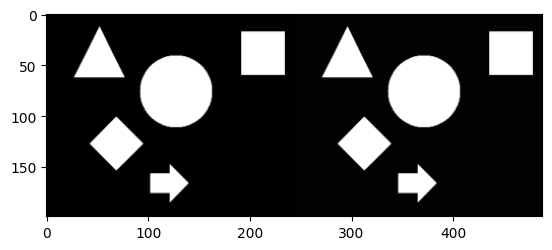

In [30]:
a = 2

og_img = plt.imread('../img/figures.png')
og_img = cv2.cvtColor(og_img, cv2.COLOR_RGB2GRAY)
h,w = og_img.shape[:2]


brighter_img = og_img.copy()
brighter_img = np.clip(og_img + a / 255., 0, 1)

plt.imshow(np.hstack([og_img, brighter_img]), cmap = 'gray')


2 ) a = 2로 두고 영상을 어둡게 변환하시오.

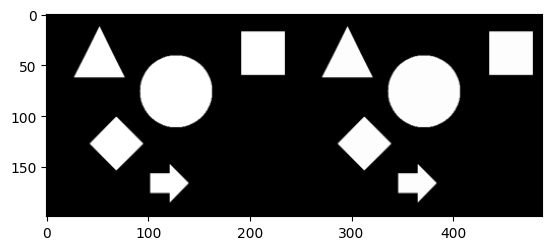

In [29]:
a = 2

og_img = plt.imread('../img/figures.png')
og_img = cv2.cvtColor(og_img, cv2.COLOR_RGB2GRAY)
h,w = og_img.shape[:2]


darker_img = og_img.copy()
darker_img = np.clip(og_img - a / 255., 0, 1)

plt.imshow(np.hstack([og_img, darker_img]), cmap = 'gray')



3 ) 영상을 반전하시오.

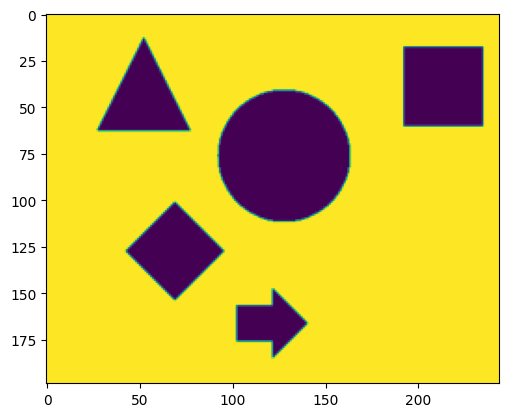

In [28]:
contrast = 1 - og_img

plt.imshow(contrast)

4. 에지 보존 효과를 지닌 스무딩 필터에 대해 답하시오.

1 ) 메디안 필터는 가우시안 필터에 비해 에지 보존 효과가 뛰어나다. 그 이유를 설명하시오.  
ans) 가우시안 필터는 필터 영역 내 전체값에 대한 평균을 내기 때문에 경계값(outlier)에 영향을 받는 반면, 메디안은 중앙값으로 처리하기 때문에, 가장 빈번한 값으로 대체된다. 엣지 부분에서는 보통 엣지를 이루는 값이 가장 빈번하므로, 엣지 보존에 메디안 필터가 적합하다.

2 ) 에지 보존 필터로 양방향 필터와 쿠와하라 필터가 있다. 이들 각각에 대해 동작 원리를 조사하시오.  
ans) 양방향 필터는 대상 필터와 주변 픽셀과의 거리 그리고 픽셀 값 차이까지 고려해서 엣지를 보전한다. 쿠와하라 필터는 필터 영역을 4분면으로 나눈 후, 각 분면 중 분산이 가장 작은 영역의 평균값으로 값을 대체한다. 보통 5x5 윈도우 필터를 사용한다.

5. [예제 2-3] 에 있는 원래 삼각형을 꼭지점 x1을 중심으로 시계 방향으로 30도 회전시키려고 한다.

1 ) 복합 변환 행렬을 구하시오.  
ans) 꼭짓점까지의 이동은 T(3,5), 시계 방향으로 회전은 R(30')로 표현한다.   
[[1,0,0]    [[cos(30), -sin(30), 0]    [[0.866, -0.500, 0]  
 [0,1,0]  *  [sin(30), cos(30),  0] =   [0.500,  0.866, 0]  
 [3,5,1]]    [     0,       0,  0]]     [3.5981, 0.2321, 1]]  

2 ) 회전 후의 세 꼭지점의 좌표를 구하시오.
ans) 

In [38]:
 T = np.array([[0.866, -0.500, 0],
               [0.500,  0.866, 0],
               [3.5981, 0.2321, 1]]  )

x1 = np.array([[2,5,1]])
x2 = np.array([[3,8,1]])
x3 = np.array([[6,7,1]])

print(f'after transformation : x1 : {(x1 @T)[0, :2]}, x2 : {(x2@T)[0, :2]}, x3 : {(x3@T)[0, :2]}')

after transformation : x1 : [7.8301 3.5621], x2 : [10.1961  5.6601], x3 : [12.2941  3.2941]


6. 다음 네 개의 꼭지점을 갖는 도형에 답하시오.  
x1 = (2,1), x2 = (2,4), x3 = (3,1), x4 = (3,4)

1 ) x방향으로 3만큼 기울이기 위한 변환 행렬을 제시하시오.

2 ) (1)의 변환을 적용한 후 꼭지점의 좌표를 계산하시오.

3) 변환 전과 후의 도형을 그리시오.

7. [예제 2-6]에서 열기와 닫기를 적용한 영상을 구하시오.

In [56]:
# opening
img = np.array([[0,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,1,0],
                [0,1,2,0,0,0,1,0],
                [0,1,3,1,0,0,2,0],
                [0,1,3,1,0,0,2,0],
                [0,1,2,3,4,4,3,0],
                [0,0,0,0,1,3,1,0],
                [0,0,0,0,0,0,0,0]])

pad_img = np.pad(img, ((0,0),(1,1)), 'constant', constant_values = 10000 )

S = np.array([0,0,0])
result_img = img.copy()


for j in range(img.shape[0]) :
    for i in range(img.shape[1]) :
        result_img [j,i] = np.min(img[j, max(0, i-1) : min(8, i+2)]) #erosion # skip S for similicity

for j in range(img.shape[0]) :
    for i in range(img.shape[1]) :
        result_img [j,i] = np.max(result_img[j, max(0, i-1) : min(8, i+2)]) #dilation # skip S for similicity

print(result_img)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 2 3 3 3 3 3]
 [0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0]]


In [57]:
# closing
img = np.array([[0,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,1,0],
                [0,1,2,0,0,0,1,0],
                [0,1,3,1,0,0,2,0],
                [0,1,3,1,0,0,2,0],
                [0,1,2,3,4,4,3,0],
                [0,0,0,0,1,3,1,0],
                [0,0,0,0,0,0,0,0]])

pad_img = np.pad(img, ((0,0),(1,1)), 'constant', constant_values = 10000 )

S = np.array([0,0,0])
result_img = img.copy()


for j in range(img.shape[0]) :
    for i in range(img.shape[1]) :
        result_img [j,i] = np.max(img[j, max(0, i-1) : min(8, i+2)]) #dilation # skip S for similicity

for j in range(img.shape[0]) :
    for i in range(1, img.shape[1]) :
        result_img [j,i] = np.min(result_img[j, max(0, i-1) : min(8, i+2)]) #erosion # skip S for similicity


print(result_img)

[[0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


8. 모폴로지에 대해 답하시오.

1 ) 아래 구조요소를 이용하여 [그림 2-37(a)]에 있는 이진 영상에 팽창, 침식, 열기, 닫기를 적용한 결과를 제시하시오.

In [66]:
img = np.array([[0,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,1,0],
                [0,1,1,0,0,0,1,0],
                [0,1,1,1,0,0,1,0],
                [0,1,1,1,0,0,1,0],
                [0,1,1,1,1,1,1,0],
                [0,0,0,0,1,1,1,0],
                [0,0,0,0,0,0,0,0]
               ], np.uint8)

cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilation = cv2.dilate(img, cross_kernel)
erosion = cv2.dilate(img, cross_kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, cross_kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cross_kernel)

print(dilation, end = '\n\n')
print(erosion, end = '\n\n')
print(opening, end = '\n\n')
print(closing, end = '\n\n')

[[0 1 1 0 0 0 1 0]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 0]]

[[0 1 1 0 0 0 1 0]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 0]]

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 0]
 [0 0 0 0 0 1 0 0]]



In [69]:
img = np.array([[0,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,1,0],
                [0,1,1,0,0,0,1,0],
                [0,1,1,1,0,0,1,0],
                [0,1,1,1,0,0,1,0],
                [0,1,1,1,1,1,1,0],
                [0,0,0,0,1,1,1,0],
                [0,0,0,0,0,0,0,0]
               ], np.uint8)

cross_kernel = np.array([[0,0,0,], [0,0,0], [0,0,0]], np.uint8)
dilation = cv2.dilate(img, cross_kernel)
erosion = cv2.dilate(img, cross_kernel)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, cross_kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cross_kernel)

print(dilation, end = '\n\n')
print(erosion, end = '\n\n')
print(opening, end = '\n\n') ## TODO : 0,1값으로만 이루어져있었는데, cv2 opening, closing 함수를 사용하니 255 값이 리턴되었다. 무슨 일?!
print(closing, end = '\n\n')

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1]
 [0 0 1 1 0 0 0 1]
 [0 0 1 1 1 0 0 1]
 [0 0 1 1 1 0 0 1]
 [0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1]]

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 1]
 [0 0 1 1 0 0 0 1]
 [0 0 1 1 1 0 0 1]
 [0 0 1 1 1 0 0 1]
 [0 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1]]

[[  0   0   0   0   0   0   0   0]
 [  0 255 255 255 255 255 255 255]
 [  0 255   0   0   0   0   0   0]
 [  0 255   0   1   1   0   0   0]
 [  0 255   0   1   1   0   0   0]
 [  0 255   0   1   1   1   0   0]
 [  0 255   0   1   1   1   0   0]
 [  0 255   0   1   1   1   1   1]]

[[255 255 255 255 255 255 255 255]
 [255   0   0   0   0   0   0   0]
 [255   0   0   0   0   0   0   0]
 [255   0   0   1   1   0   0   0]
 [255   0   0   1   1   0   0   0]
 [255   0   0   1   1   1   0   0]
 [255   0   0   1   1   1   0   0]
 [255   0   0   1   1   1   1   1]]



9. RGB 모델에서 다음에 예시한 것과 같은 방식으로 값을 변화시켜가며 색을 관찰하시오.

첫번째 줄



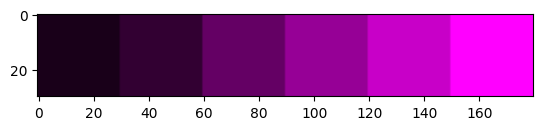

두번째 줄



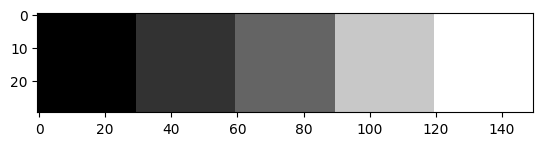

세번째 줄



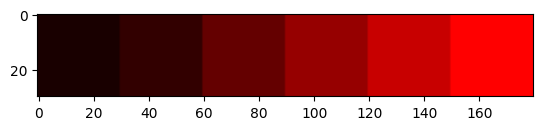

In [73]:
def show_color(rgb_value) :
    return np.full((30,30,3), rgb_value)
    
first_row = [(25,0,25), (50,0,50), (100,0,100), (150,0, 150), (200,0,200), (255,0,255)]
second_row = [(0,0,0), (50,50,50), (100,100,100), (200,200,200), (255,255,255)]
third_row = [(25,0,0), (50,0,0), (100,0,0), (150,0,0), (200,0,0), (255,0,0)]

print('첫번째 줄\n')
plt.imshow(np.hstack([show_color(color) for color in first_row] ))
plt.show()

print('두번째 줄\n')
plt.imshow(np.hstack([show_color(color) for color in second_row] ))
plt.show()

print('세번째 줄\n')
plt.imshow(np.hstack([show_color(color) for color in third_row] ))              
plt.show()

10. 컬러 영상에 히스토그램 평활화를 적용하려고 한다. 세 채녈에 독립적으로 적용한 것을 결합하면 이상한 결과를 얻는다.

1 ) 그 이유를 설명하시오.  
ans) 히스토그램 평활화는 채널의 누적합 히스토그램을 사용한다. 누적합 히스토그램은 채널별로 독립적이므로, 이 독립적으로 나온 값을 합칠 시, 예상치 않은 값이 나올 수 있다.

2 )적절한 방법을 조사하여 제시하시오.  
ans) 컬러 밸런스를 깨지 않은 상태로 평활화를 진행하는 것이 중요하다. RGB값을 하나로 합치는 방법이 있는데, RGB를 HSV나 YUV, YCbCr 값으로 변환시킨 후 진행시킬 수 있다.
